In [175]:
import scipy
from scipy.integrate import quad
import numpy as np
from numpy.linalg import inv, eig, qr, det
import math
import random

In [176]:
n = 100
p = 10

X = np.random.rand(n,p)

for count in range(n):
    X[count][0] = 1

L = [[0 for a in range(p)] for b in range(p)]
L[0][0]=1

for i in range(1,p):
    L[i][i] = 1 #random.random()
    
#L = np.matrix('1 0; 0 0.5')
    
#B = np.random.rand(p)
B = [0.01 for count in range(p)]
#t_0 = 0.3


w = 5
y = X @ B + np.random.rand(n)/1000
#y = np.random.rand(n)

#y = np.array([1,0,2])

In [177]:
y

array([0.05968555, 0.06240797, 0.05202304, 0.04718104, 0.04714416,
       0.05091643, 0.0554435 , 0.052679  , 0.07246018, 0.06618836,
       0.05385512, 0.06353831, 0.05632124, 0.05068523, 0.06831618,
       0.06762757, 0.05584384, 0.06822474, 0.04433685, 0.04532299,
       0.05518923, 0.04913636, 0.05785292, 0.0621753 , 0.05447363,
       0.06432427, 0.05593956, 0.04761378, 0.04865419, 0.05568933,
       0.0489937 , 0.06236559, 0.05956649, 0.06572907, 0.05066848,
       0.05838716, 0.06891232, 0.06432404, 0.06324005, 0.04793586,
       0.0719068 , 0.05418318, 0.04369757, 0.04967037, 0.06318802,
       0.04781279, 0.05243666, 0.05825885, 0.04275905, 0.04124661,
       0.05686155, 0.06273761, 0.05077532, 0.06704576, 0.04203784,
       0.05838078, 0.06113516, 0.06687807, 0.07626062, 0.07148453,
       0.05003593, 0.06046615, 0.04639858, 0.04586091, 0.0651943 ,
       0.05732468, 0.04672555, 0.04923812, 0.05547325, 0.05710372,
       0.05632915, 0.04367569, 0.05514607, 0.05604738, 0.05039

In [178]:
X @ B

array([0.05887875, 0.06203199, 0.05154488, 0.04661541, 0.04675463,
       0.05045969, 0.05455714, 0.05233623, 0.07213624, 0.06601444,
       0.05300953, 0.06259124, 0.05581804, 0.05064236, 0.06746773,
       0.06729151, 0.0550452 , 0.06799825, 0.04400959, 0.0444193 ,
       0.05507545, 0.04873473, 0.05745422, 0.06137852, 0.0540804 ,
       0.06397865, 0.05568567, 0.04747344, 0.04860707, 0.05510815,
       0.04853445, 0.06232405, 0.05881487, 0.06570984, 0.05059385,
       0.05754601, 0.06808334, 0.06413479, 0.06278714, 0.04738453,
       0.07117668, 0.05360824, 0.04310406, 0.04950925, 0.06252165,
       0.04705119, 0.05234225, 0.05783004, 0.04188464, 0.040949  ,
       0.05661772, 0.06204881, 0.05006684, 0.06618596, 0.04119212,
       0.05789601, 0.06068799, 0.06597721, 0.07530663, 0.07081397,
       0.0493752 , 0.06019292, 0.04625335, 0.04535334, 0.06497789,
       0.05731486, 0.04651375, 0.04875405, 0.05530586, 0.05690623,
       0.05550296, 0.04338191, 0.05450275, 0.05521043, 0.05027

In [179]:
## QR Decomposition of X

Q, R = qr(X)
#q = (t_0 ** 2) * (Q @ inv(R@R @ L @ L @ R.T) @ Q.T)

In [180]:
## Eigendecomposition of R(L^2)R^T

D_arr, V = eig(R @ L @ L @ R.T)
D = np.diag(D_arr) # Converting eigenvalues into eigenvalue matrix
d = 1 # Product of eigenvalues
for ele in D_arr:
    d = d*ele

In [181]:
## Storing important values
yTy = y.T @ y
yTQQTy = y.T @ Q @ Q.T @ y
yTQV = y.T @ Q @ V
VTQTy = V.T @ Q.T @ y

In [182]:
tau_0 = 0.5
print(det(np.identity(n)+(tau_0**2)*X@L@L@X.T))
d = 1
for d_i in D_arr:
        d *= (1+(tau_0**2)*d_i)
print(d)

610705.0987206143
610705.0987206168


In [183]:
def probability(tau):
    #print(tau)
    det = 1
    for d_i in D_arr:
        det *= (1+(tau**2)*d_i)
    #print(det)
    #print((yTQV @ inv(D+(1/(tau**2))*np.identity(p)) @ VTQTy)/(tau**2))
    mult = yTy - yTQQTy + (yTQV @ inv(D+(1/(tau**2))*np.identity(p)) @ VTQTy)/(tau**2)
    #mult = yTy/(tau**2) - (yTV @ inv(D+(1/(tau**2))*np.identity(D.shape[0])) @ VTy)/(tau**4)
    #print(mult)
    #print((w/2 + mult/2)**(-0.5*(n+w)))
    #print("-------------------")
    #print(mult/2)
    return det**(-0.5) * ((w/2 + mult/2)**(-0.5*(n+w)))*(1/((tau**(-1))*(1+tau**(-2))))


In [184]:
def unop_probability(tau):
    det = 1
    for d_i in D_arr:
        det *= (1+(tau**2)*d_i)
        
    #mat = np.identity(n) - (tau**2) * Q@inv(inv(R@L@L@R.T)+(tau**2)*np.identity(p))@Q.T
    mat = inv(np.identity(n)+(tau**2)*(X@L@L@X.T))
    return det**(-0.5) * ((w/2 + (y.T @ mat @ y)/2)**(-0.5*(n+w)))*(1/((tau**(-1))*(1+tau**(-2))))

In [185]:
def g():
    res = 0.1
    k = 4
    prob = lambda x: probability(x)
    val = quad(prob, 0.000001, k)[0]
    #print(val)
    while res == 0 or (abs((val-res)/res) > NORM_THRESHOLD):
        k = k + NORM_STEP
        res = val
        val = quad(prob, 0.000001, k)[0]
        #print(t_0+k)
        #print(val)
        #print('-----')
    #print("DONE")
    
    return res, k

In [186]:
def F_inv(x):
    bound = 0.01
    prob = lambda x: probability(x)
    scal = g()[0]
    val = quad(prob, 0.000001, bound)[0]/scal
    while (abs(val - x) > OUTPUT_THRESHOLD):
        bound = bound * x/val
        val = quad(prob, 0, bound)[0]/scal
    
    return bound

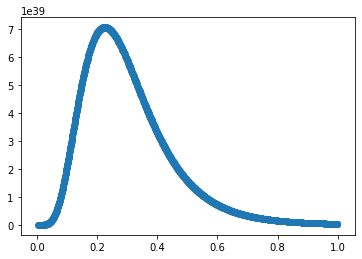

In [187]:
g_val = 1#g()[0]

import matplotlib.pyplot as plt
a = [(i+0.01)/1000.0 for i in range(5,1000)]
b = [probability(j)*(10**(64)) for j in a]
plt.scatter(a,b)

In [188]:
probability(0.09)

1.5450756710507891e-25

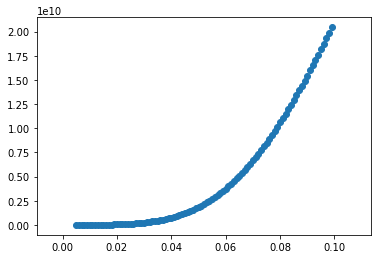

In [189]:
g_val = 1#g()[0]

import matplotlib.pyplot as plt
a = [(i+0.01)/1000.0 for i in range(5,100)]
b = [unop_probability(j)*(10**(35)) for j in a]
plt.scatter(a,b)